# Building Phylogeny

First we import the Trisicell pakcage as:

In [1]:
import trisicell as tsc

tsc.settings.verbosity = 3  # show errors(0), warnings(1), info(2), hints(3)
tsc.logg.print_version()

Running trisicell 0.0.13 (python 3.7.10) on 2021-09-03 10:26.


In [2]:
adata = tsc.datasets.example()

In [3]:
adata

AnnData object with n_obs × n_vars = 83 × 452
    obs: 'group', 'subclone_color', 'Axl', 'Erbb3', 'Mitf', 'MPS'
    var: 'CHROM', 'POS', 'REF', 'ALT', 'START', 'END', 'Allele', 'Annotation', 'Gene_Name', 'Transcript_BioType', 'HGVS.c', 'HGVS.p'
    layers: 'genotype', 'mutant', 'total'

Here is the information about the cells:

In [4]:
adata.obs

,group,subclone_color,Axl,Erbb3,Mitf,MPS
cell,,,,,,
C15_1,C15,#B9D7ED,6.328047,0.000000,0.000000,-0.727720
C15_2,C15,#B9D7ED,6.978424,3.604071,4.066950,0.170112
C15_3,C15,#B9D7ED,7.418106,5.479295,5.460087,-1.207896
C15_4,C15,#B9D7ED,8.461807,4.725196,2.711495,-2.571793
C15_5,C15,#B9D7ED,6.884476,6.314334,0.000000,-0.620660
...,...,...,...,...,...,...
C1_7,C1,#FF0000,7.931919,7.021924,3.656496,1.273881
C11_4,C11,#FF00AA,7.707152,6.642990,0.000000,0.644507
C11_5,C11,#FF00AA,7.078204,6.662490,0.000000,1.457377


Here is the information about the mutations:

In [5]:
adata.var

,CHROM,POS,REF,ALT,START,END,Allele,Annotation,Gene_Name,Transcript_BioType,HGVS.c,HGVS.p
mutation,,,,,,,,,,,,
mutation_1,chr1,15815968,A,['G'],15815968,15815968,G,missense_variant,Terf1,protein_coding,c.581A>G,p.Tyr194Cys
mutation_2,chr1,37396158,G,['A'],37396158,37396158,A,synonymous_variant,Inpp4a,protein_coding,c.2622G>A,p.Val874Val
mutation_3,chr1,38045805,T,['C'],38045805,38045805,C,missense_variant,Eif5b,protein_coding,c.2732T>C,p.Val911Ala
mutation_4,chr1,51071476,G,['A'],51071476,51071476,A,missense_variant,Tmeff2,protein_coding,c.448G>A,p.Gly150Ser
mutation_5,chr1,54997173,A,['G'],54997173,54997173,G,missense_variant,Sf3b1,protein_coding,c.2740T>C,p.Phe914Leu
...,...,...,...,...,...,...,...,...,...,...,...,...
mutation_448,chrX,105877558,A,['G'],105877558,105877558,G,synonymous_variant,Atrx,protein_coding,c.675T>C,p.Gly225Gly
mutation_449,chrX,134605536,A,['G'],134605536,134605536,G,missense_variant,Hnrnph2,protein_coding,c.629A>G,p.Tyr210Cys
mutation_450,chrX,155214105,A,['T'],155214105,155214105,T,missense_variant,Sat1,protein_coding,c.232T>A,p.Tyr78Asn


Now we will do some filteration to remove artifacts.

In [6]:
tsc.pp.filter_mut_vaf_greater_than_coverage_mutant_greater_than(
    adata, min_vaf=0.4, min_coverage_mutant=20, min_cells=2
)
tsc.pp.filter_mut_reference_must_present_in_at_least(adata, min_cells=1)
tsc.pp.filter_mut_mutant_must_present_in_at_least(adata, min_cells=2)

Matrix with n_obs × n_vars = 83 × 268
Matrix with n_obs × n_vars = 83 × 267
Matrix with n_obs × n_vars = 83 × 267


In [7]:
tsc.pp.build_scmatrix(adata)
df_in = adata.to_df()

In [8]:
# df_out = tsc.tl.booster(
#     df_in,
#     alpha=0.001,
#     beta=0.2,
#     solver="SCITE",
#     sample_on="muts",
#     sample_size=20,
#     n_samples=9000,
#     n_jobs=16,
# )
df_out = tsc.tl.scistree(df_in, alpha=0.001, beta=0.2)

running ScisTree with alpha=0.001, beta=0.2
input -- size: 83x267
input -- 0: 9968#, 45.0%
input -- 1: 4020#, 18.1%
input -- NA: 8173#, 36.9%
input -- CF: False
output -- size: 83x267
output -- 0: 11308#, 51.0%
output -- 1: 10853#, 49.0%
output -- NA: 0#, 0.0%
output -- CF: True
output -- time: 59.0s (0:00:59.043201)
flips -- #0->1: 1881
flips -- #1->0: 27
flips -- #NA->0: 3194
flips -- #NA->1: 4979
rates -- FN: 0.320
rates -- FP: 0.00332758
rates -- NA: 0.369
score -- NLL: 4112.965352416734


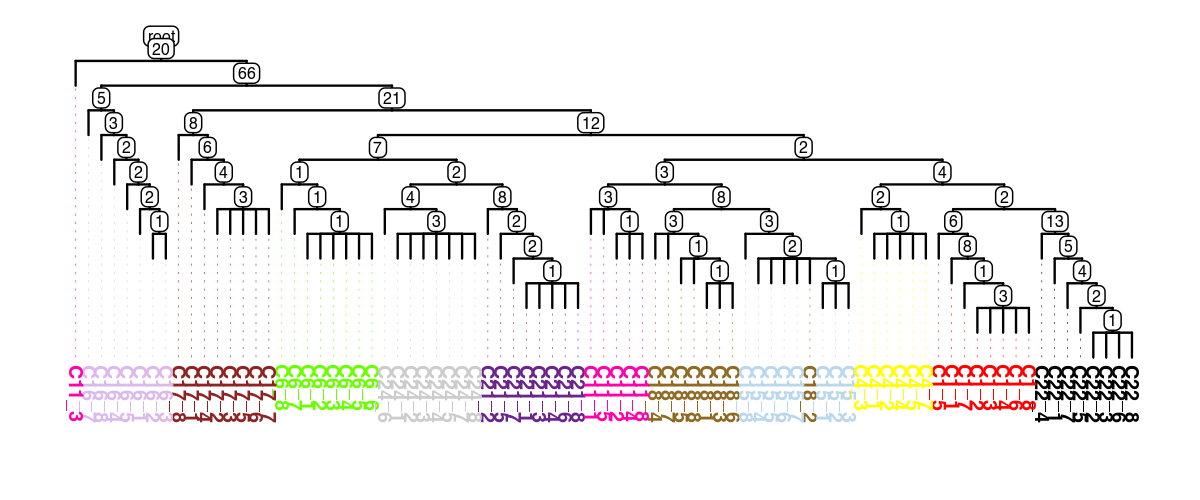

In [9]:
tree = tsc.ul.to_tree(df_out)
tsc.pl.dendro_tree(
    tree,
    cell_info=adata.obs,
    label_color="subclone_color",
    width=1200,
    height=500,
    dpi=200,
)

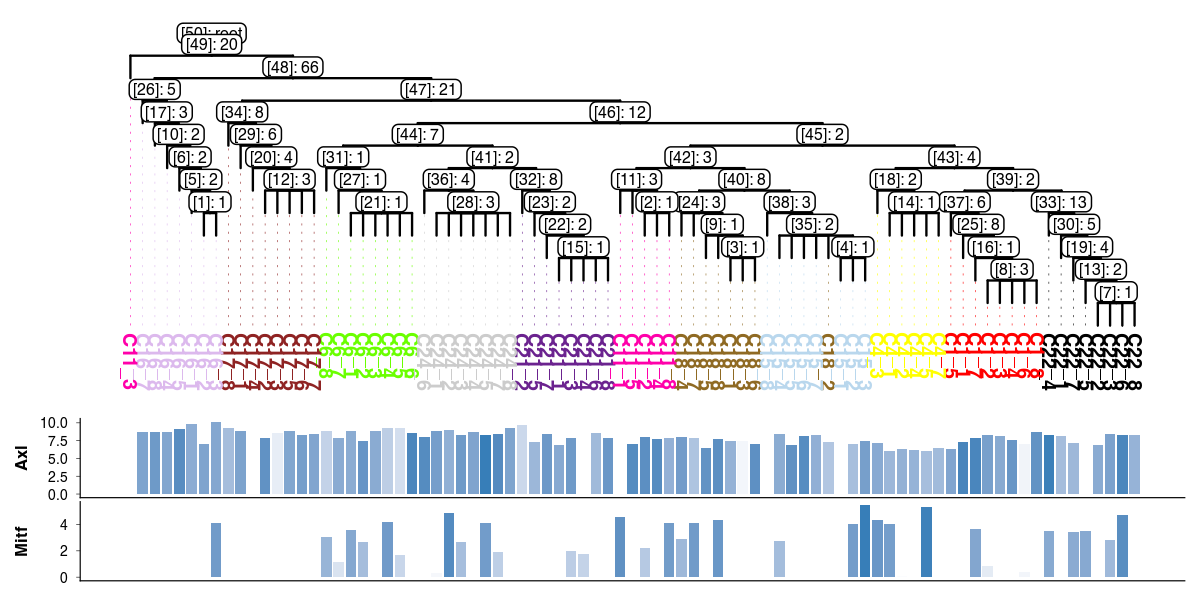

In [10]:
tsc.pl.dendro_tree(
    tree,
    cell_info=adata.obs,
    label_color="subclone_color",
    width=1200,
    height=600,
    dpi=200,
    distance_labels_to_bottom=3,
    inner_node_type="both",
    inner_node_size=2,
    annotation=[
        ("bar", "Axl", "Erbb3", 0.2),
        ("bar", "Mitf", "Mitf", 0.2),
    ],
)

List of mutations branching at node with id `[43]`

In [11]:
mut_ids = tree.graph['mutation_list'][tree.graph['mutation_list']['node_id'] == '[43]']
adata.var.loc[mut_ids.index]

,CHROM,POS,REF,ALT,START,END,Allele,Annotation,Gene_Name,Transcript_BioType,HGVS.c,HGVS.p
index,,,,,,,,,,,,
mutation_162,chr7,28042135,A,['C'],28042135,28042135,C,missense_variant,Psmc4,protein_coding,c.1109T>G,p.Ile370Ser
mutation_349,chr13,103753116,T,['G'],103753116,103753116,G,synonymous_variant,Srek1,protein_coding,c.1039A>C,p.Arg347Arg
mutation_429,chr19,4035556,G,['C'],4035556,4035556,C,missense_variant,Gstp1,protein_coding,c.550C>G,p.Leu184Val
mutation_8,chr1,74287097,T,['G'],74287097,74287097,G,missense_variant,Pnkd,protein_coding,c.242T>G,p.Ile81Ser
